In [154]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import os
import re
from src.bootstrap_error_analysis import *
from src.run_gsort_v2_wuericmod import get_vision_data

%load_ext autoreload
%autoreload 2

/Volumes/Lab/Users/jeffbrown/g-sort/src/utilities/visionloader.py


/Volumes/Lab/Users/jeffbrown/g-sort/src/electrode_map.py:517: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LITKE_512_ARRAY_ADJ_MAT = np.array([
/Volumes/Lab/Users/jeffbrown/g-sort/src/electrode_map.py:1552: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LITKE_519_ARRAY_ADJ_MAT = np.array([


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [289]:
file = "/Volumes/Scratch/Users/jeffbrown/single_gsort_30mu_serial_rerun/2021-05-27-0/data002/kilosort_data001/data001/gsort_full_data_tensor.mat"

In [290]:
loaded_data = loadmat(file)

In [291]:
loaded_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'cells', 'gsorted_cells', 'probs', 'filtered_probs', 'regularization_one', 'regularization_two', 'run'])

In [292]:
loaded_data['gsorted_cells']

array([[  1,   2,   3,   5,   6,   7,   8,   9,  13,  14,  15,  16,  17,
         18,  20,  21,  22,  23,  27,  29,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  47,  48,  50,  51,  52,  53,  55,  56,  57,  59,
         63,  69,  70,  74,  76,  80,  81,  82,  83,  85,  86,  90,  91,
         95,  97,  99, 100, 101, 102, 103, 104, 105, 107, 108, 113, 114,
        117, 118, 120, 121, 122, 123, 124, 127, 128, 131, 132, 134, 136,
        140, 141, 142, 143, 144, 148, 149, 151, 152, 153, 154, 156, 157,
        158, 159, 162, 167, 168, 169, 174, 178, 179, 180, 181, 183, 184,
        186, 187, 188, 191, 193, 198, 199, 203, 204, 205, 207, 209, 213,
        214, 217, 218, 221, 228, 232, 234, 237, 238, 241, 245, 248, 249,
        251, 259, 260, 261, 263, 264, 265, 266, 267, 269, 270, 271, 272,
        273, 274, 276, 277, 280, 281, 283, 286, 291, 292, 293, 295, 300,
        302, 307, 315, 319, 320, 322, 325, 327, 330, 336, 337, 338, 340,
        342, 344, 346, 349, 350, 351, 352, 353, 355

In [293]:
loaded_data['cells'][0][3]

11

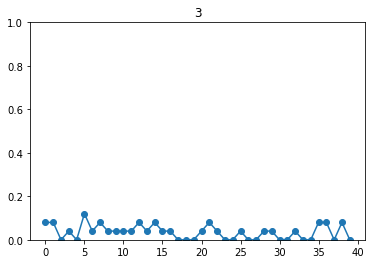

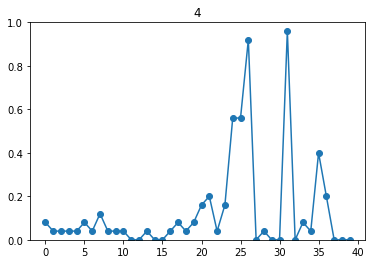

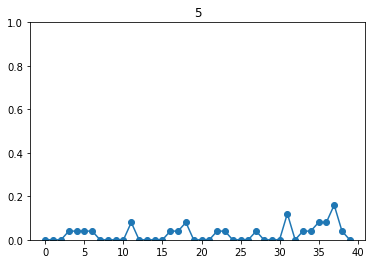

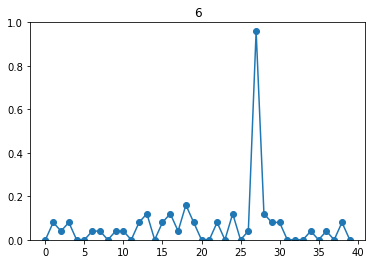

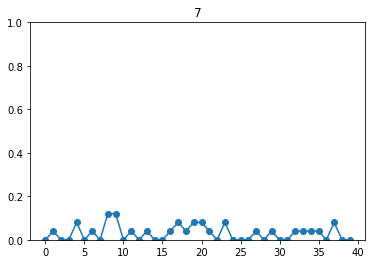

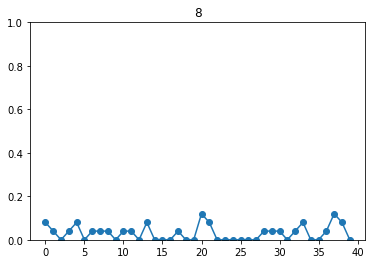

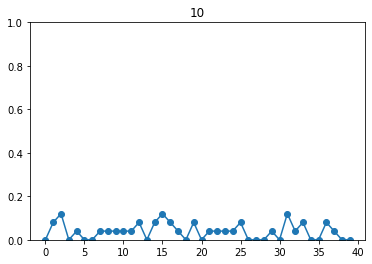

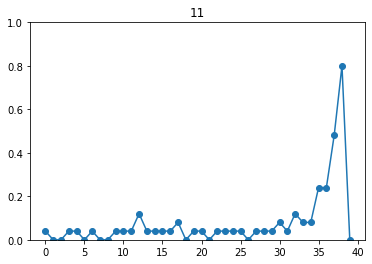

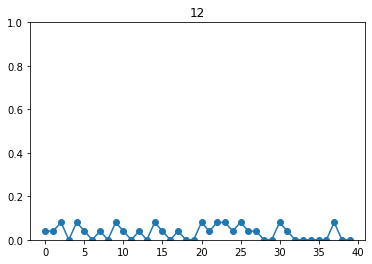

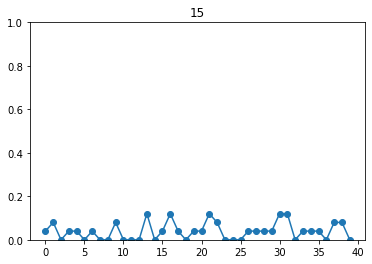

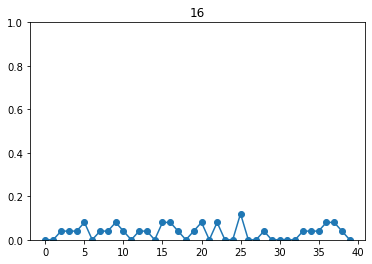

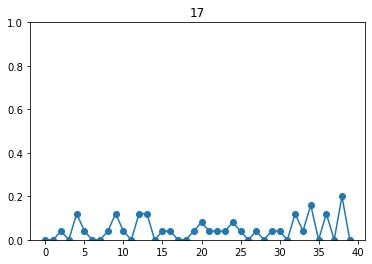

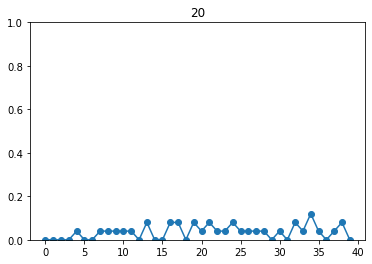

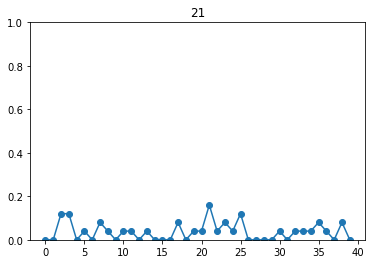

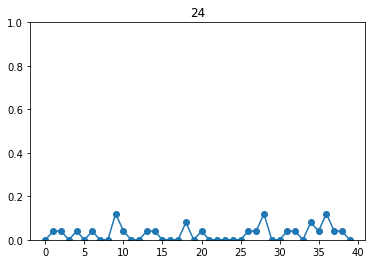

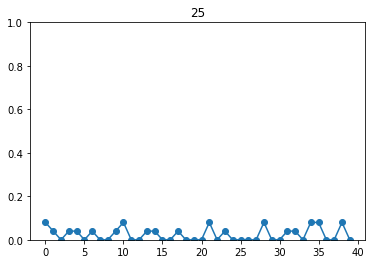

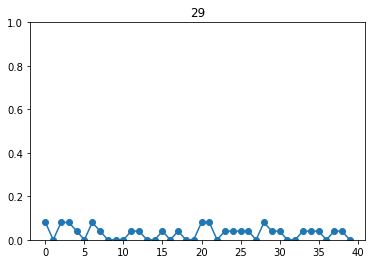

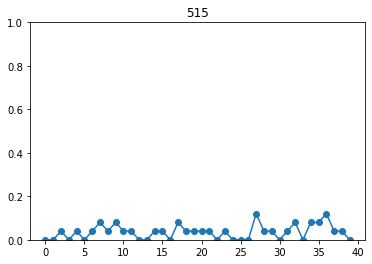

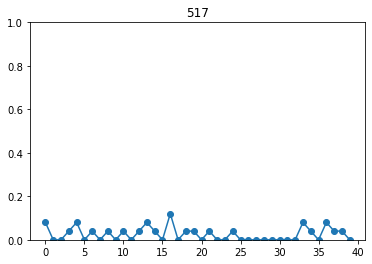

In [295]:

for i, sig in enumerate(loaded_data['filtered_probs'][1]):
    if loaded_data['run'][1][i]:
        plt.figure()
        ax = plt.subplot(111)
        ax.set_title(i+1)
        ax.plot(sig, '-o');
        ax.set_ylim([0,1])

/tmp/ipykernel_16769/1347553041.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


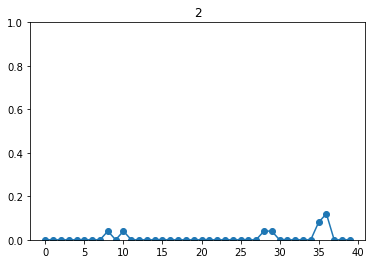

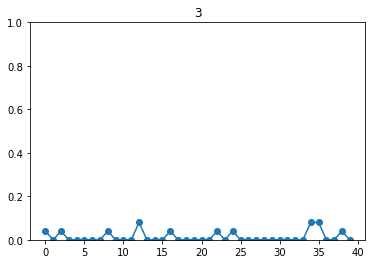

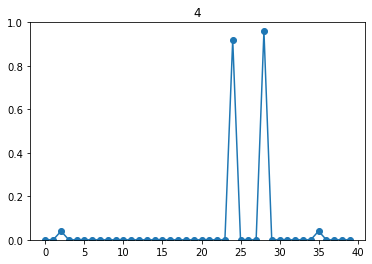

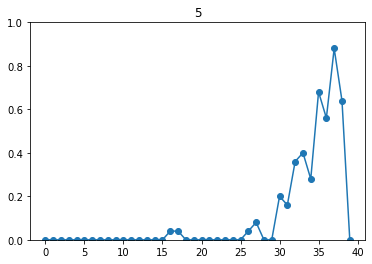

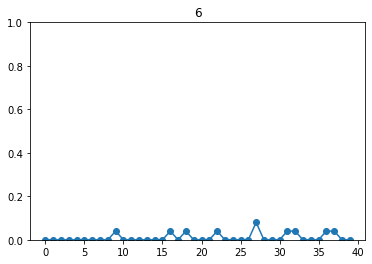

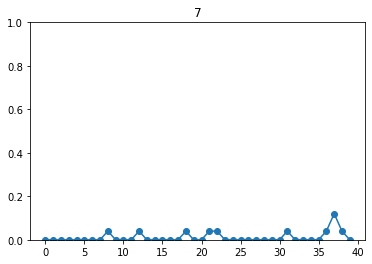

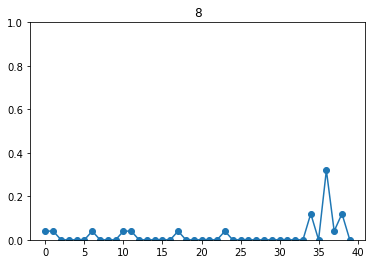

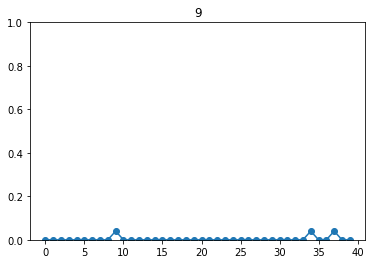

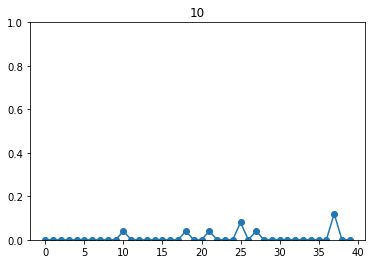

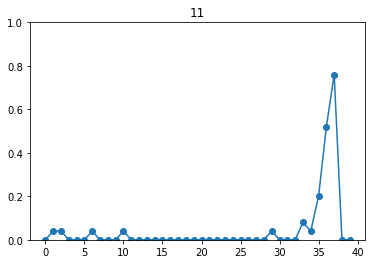

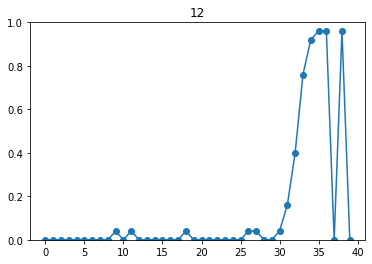

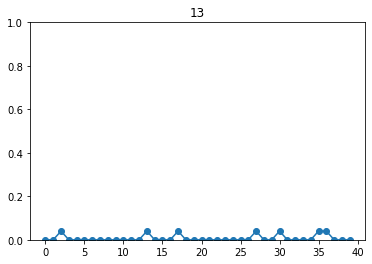

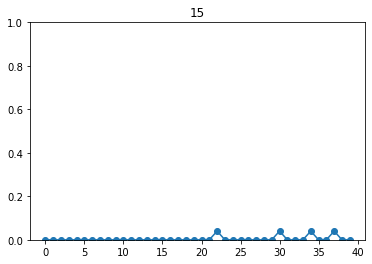

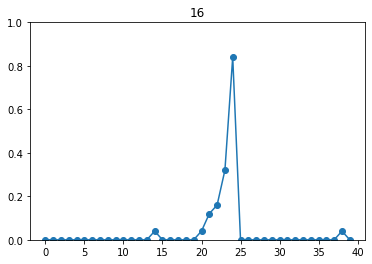

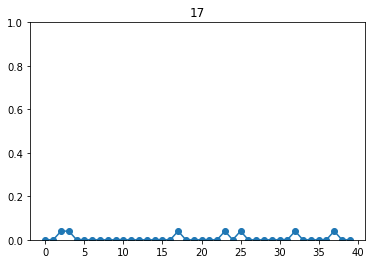

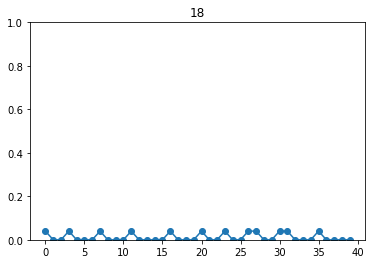

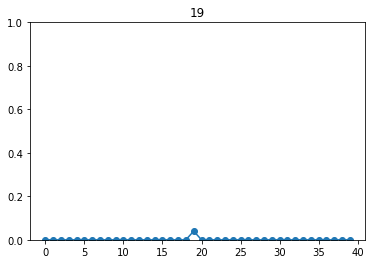

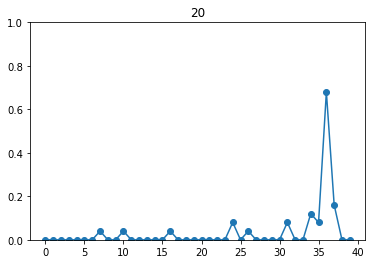

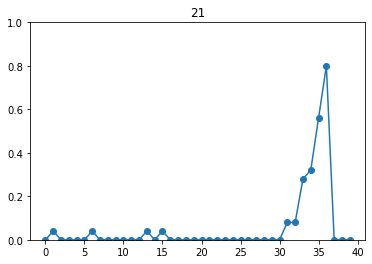

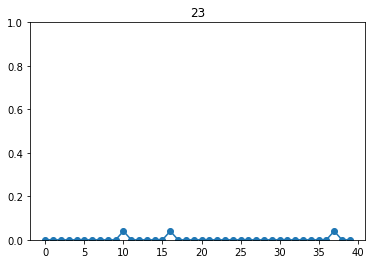

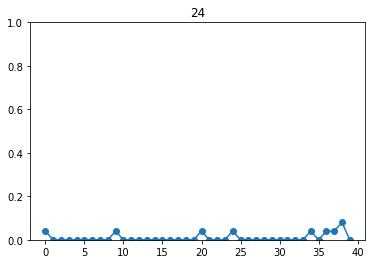

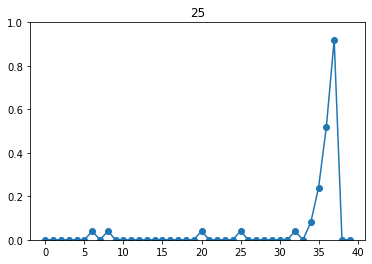

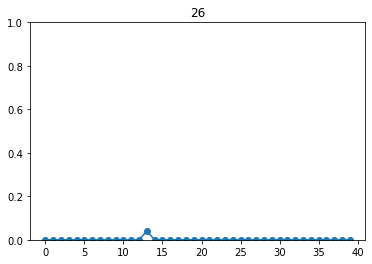

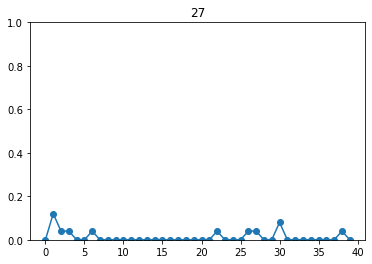

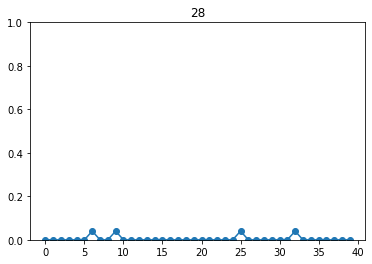

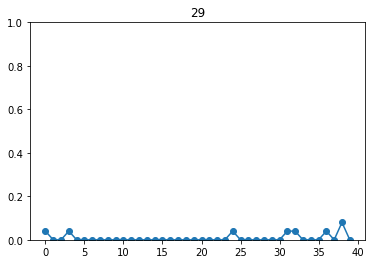

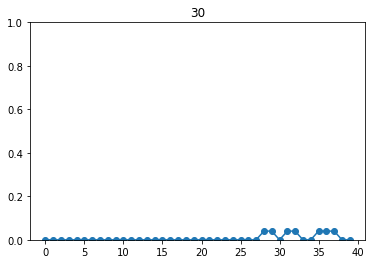

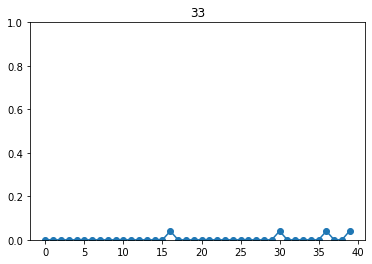

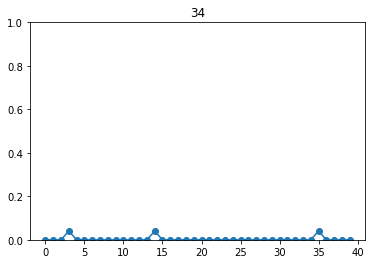

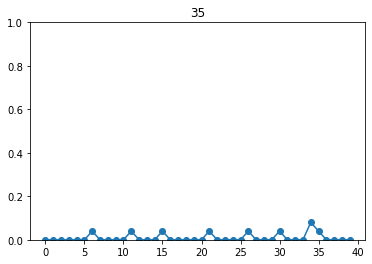

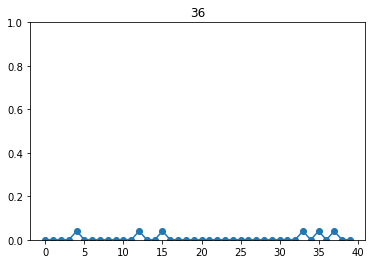

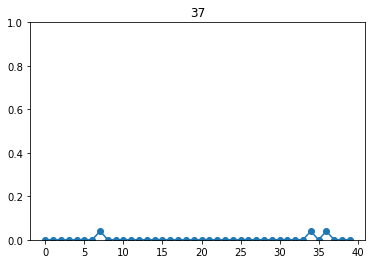

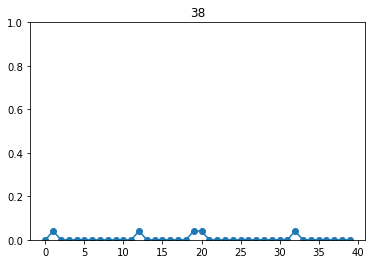

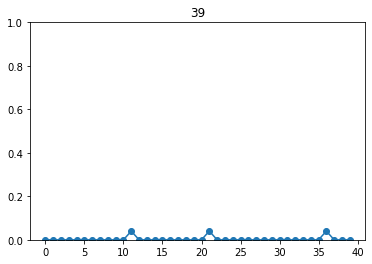

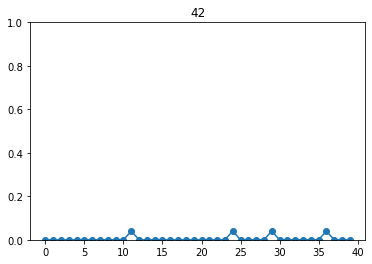

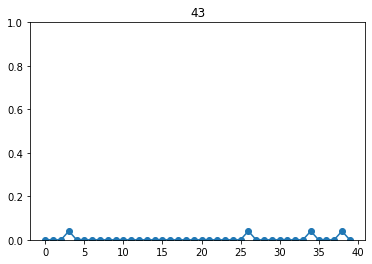

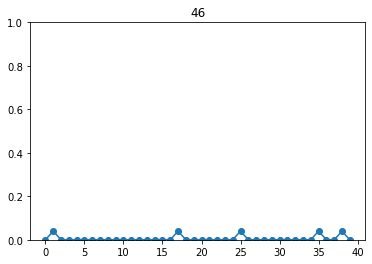

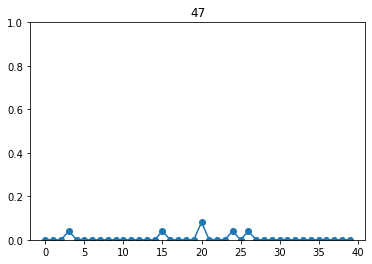

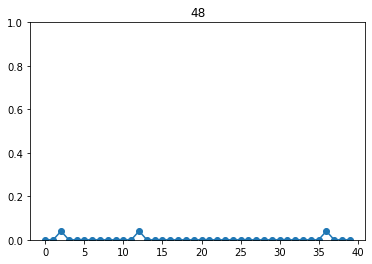

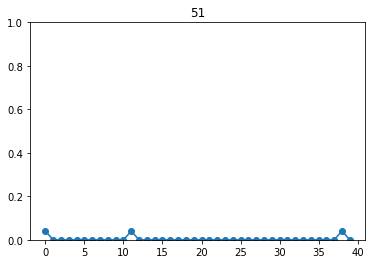

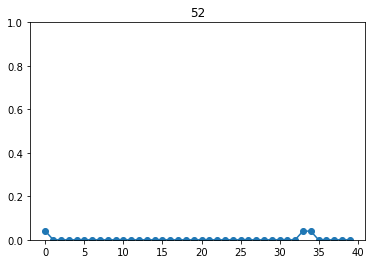

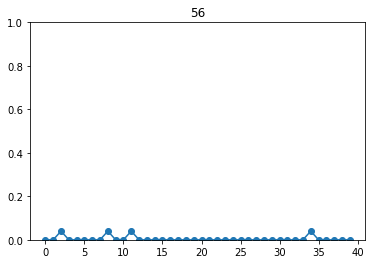

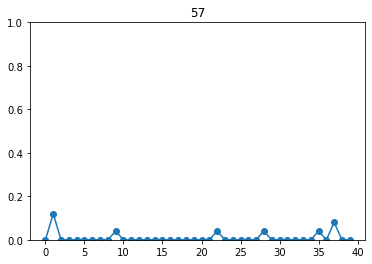

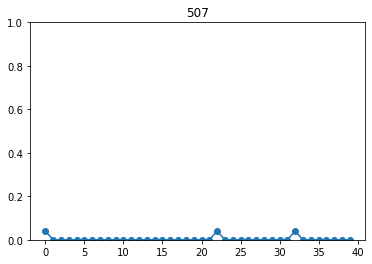

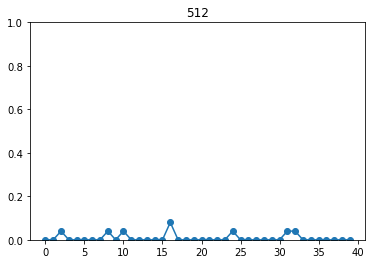

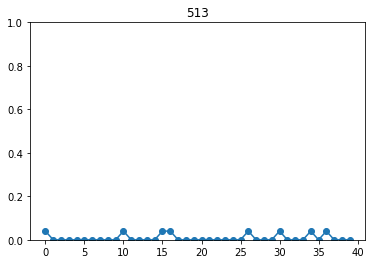

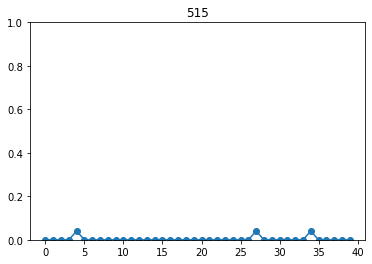

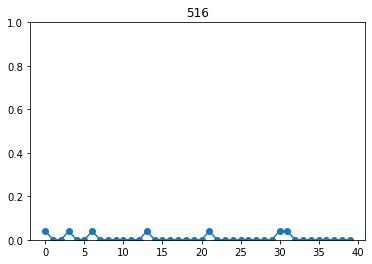

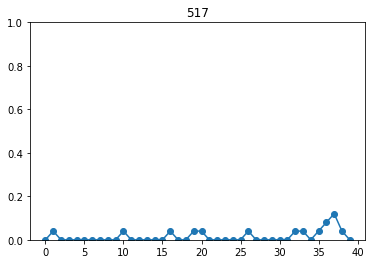

In [296]:

for i, sig in enumerate(loaded_data['filtered_probs'][2]):
    if loaded_data['run'][2][i]:
        plt.figure()
        ax = plt.subplot(111)
        ax.set_title(i+1)
        ax.plot(sig, '-o');
        ax.set_ylim([0,1])

In [288]:
ANALYSIS_BASE = "/Volumes/Analysis/"
gsort_path = "/Volumes/Scratch/Users/jeffbrown/final_tests1/"
dataset = "2016-06-13-0"
estim = "data001"
wnoise = "kilosort_data000/data000"
thr_factor = 1
n = 6
ps = [int(re.findall('\d+', m)[-1]) for m in os.listdir(os.path.join(gsort_path, dataset, estim,wnoise)) if (len(re.findall('\d+', m))==2) and (f"_n{n}_" in m)]

vcd = get_vision_data(ANALYSIS_BASE, dataset, wnoise)
noise = vcd.channel_noise




pattern_movies, total_probs, edge_probs, clusters, edges, electrodes,num_trials = get_bootstrap_information(ANALYSIS_BASE, gsort_path,dataset, estim, wnoise, ps,n, electrodes_stored = True)

dss, dss_stack, dss_inds, num_electrodes, num_samples, movie_stack= get_difference_signals(pattern_movies,clusters,edges,ANALYSIS_BASE, dataset, estim, electrodes)
average_ds, average_error,std_error, shifted_dss, shifted_dss_stack,error, error_stack = compute_average_diff_signal_and_error(dss,dss_stack, num_electrodes, num_samples)



7it [00:00, 21.32it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [00:34<00:00,  7.99it/s]


In [270]:
test_set = [i for i in range(len(electrodes))]
electrode = 0
factor =0
exp_error = np.array([np.sqrt(num_samples*2*(2*noise[e])**2) for e in electrodes])
# exp_error = np.array([16*noise[e] for e in electrodes])


new_instance_probs = get_instance_modified_edge_probs(edge_probs, error, dss_inds, exp_error, std_error, factor, test_set,num_trials)

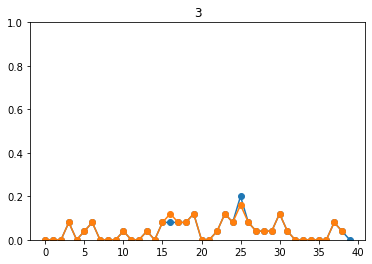

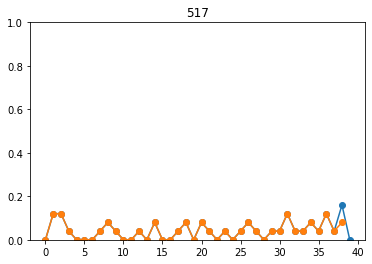

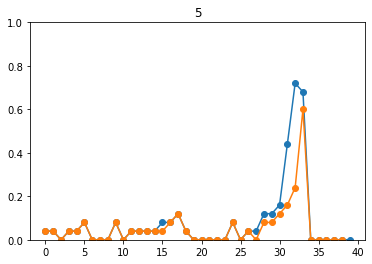

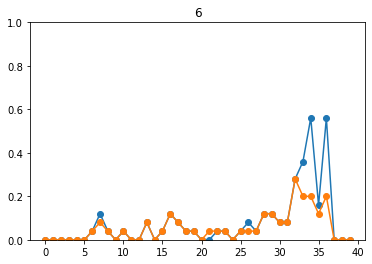

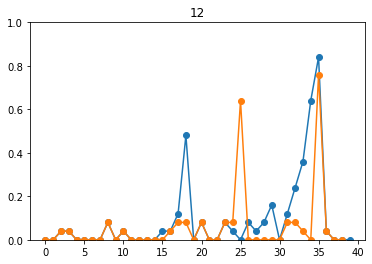

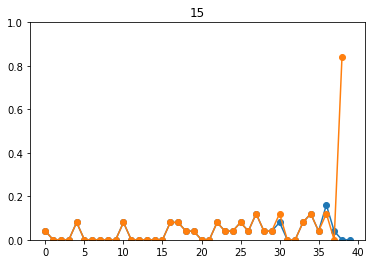

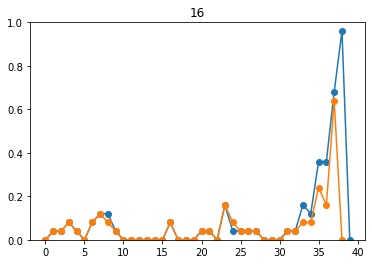

In [271]:
pattern_movies_array = np.array(pattern_movies)
for p in set(pattern_movies_array[:,0]):
    probs = new_instance_probs[ pattern_movies_array[:,0]==p]
    
    plt.figure()
    ax = plt.subplot(111)
    ax.set_title(p)
    old_probs = loaded_data['filtered_probs'][3][p-1]
    ax.plot(old_probs, '-o')
    ax.plot(probs, '-o');

    ax.set_ylim([0,1])

/tmp/ipykernel_16769/4201035719.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


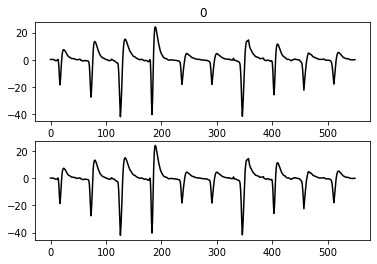

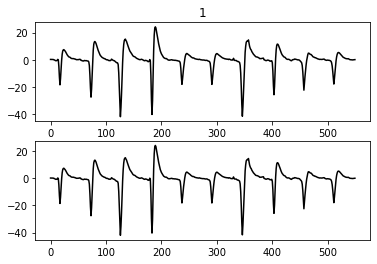

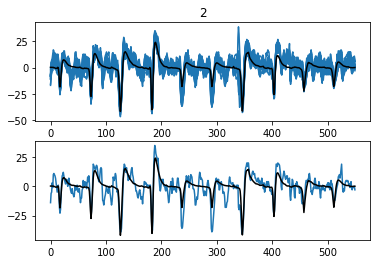

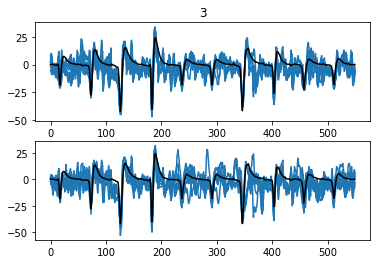

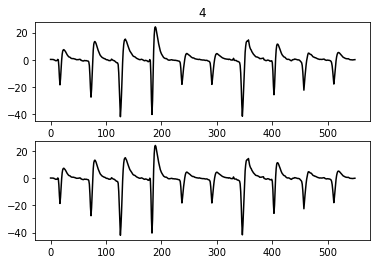

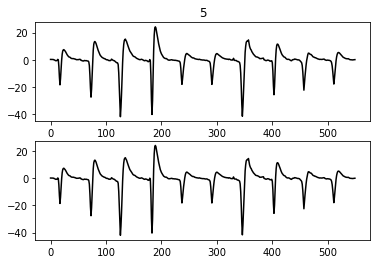

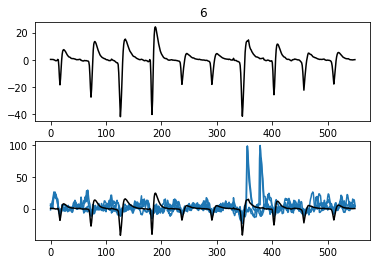

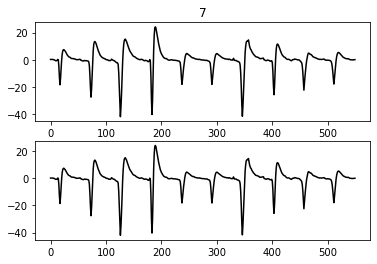

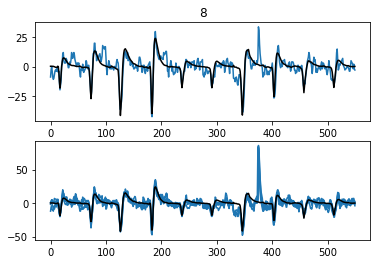

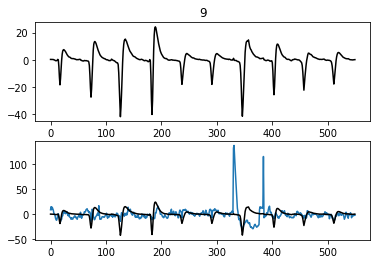

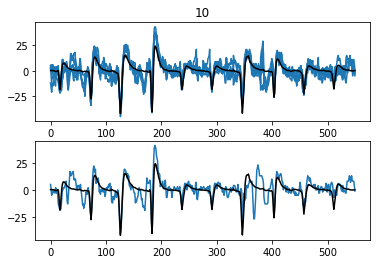

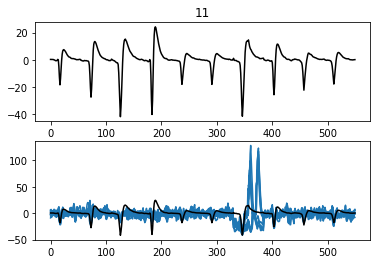

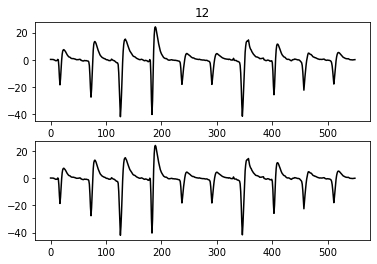

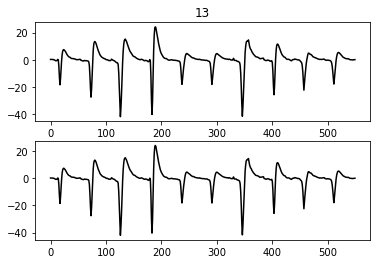

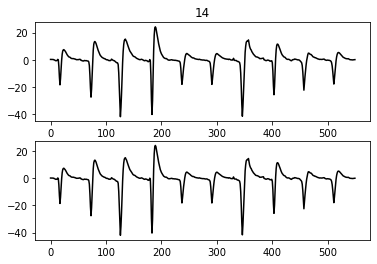

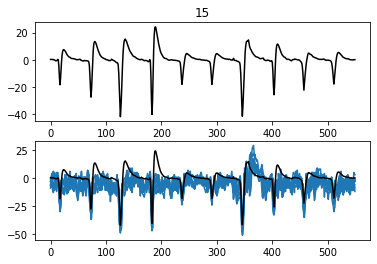

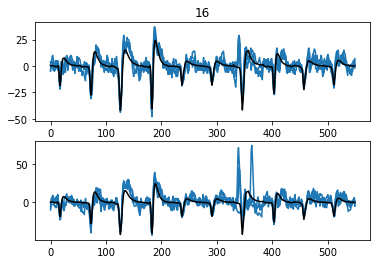

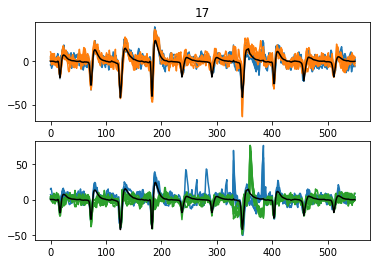

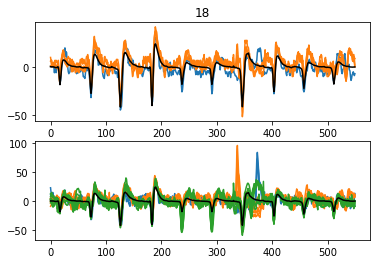

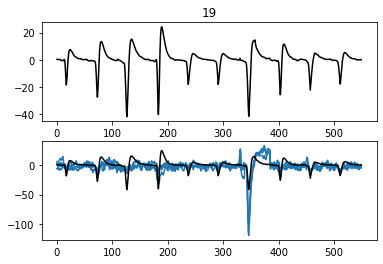

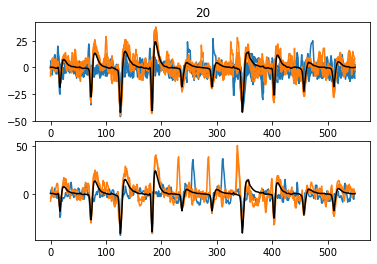

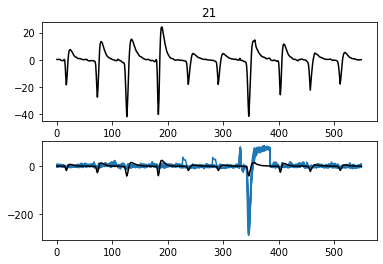

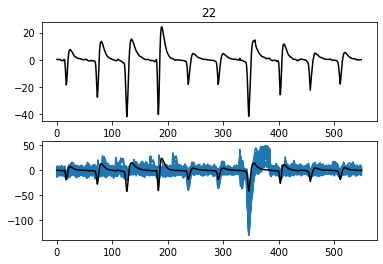

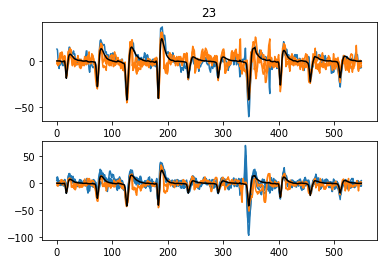

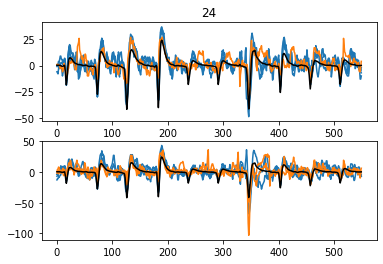

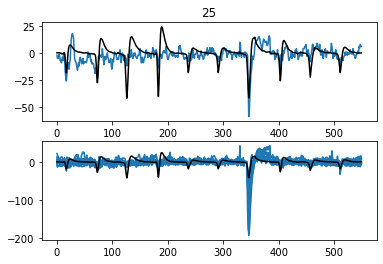

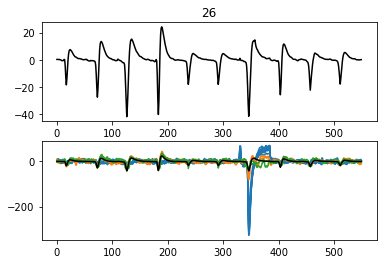

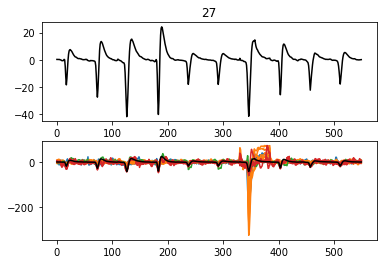

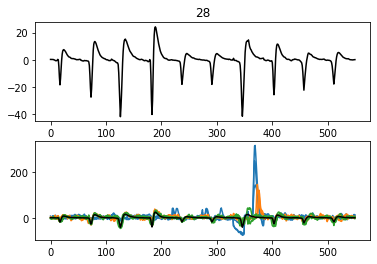

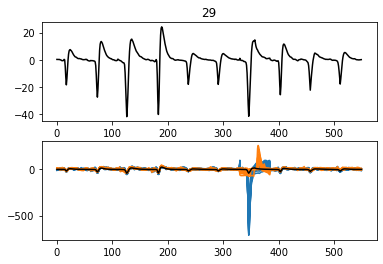

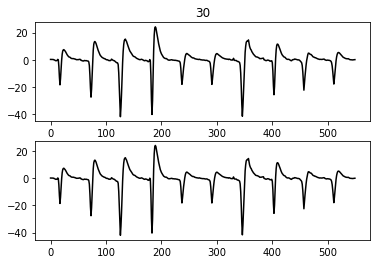

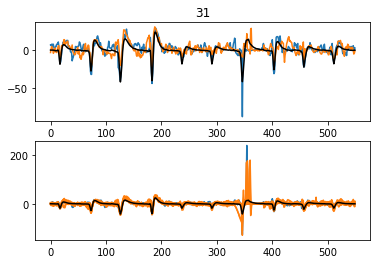

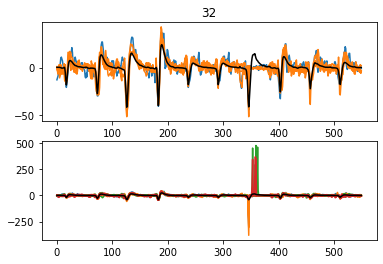

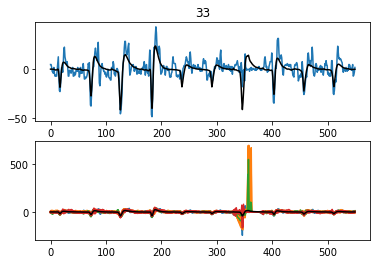

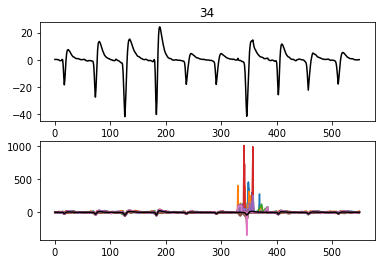

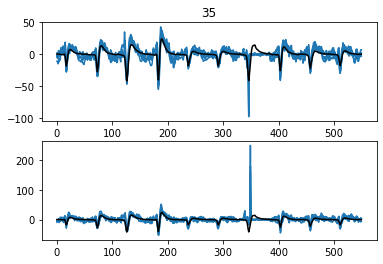

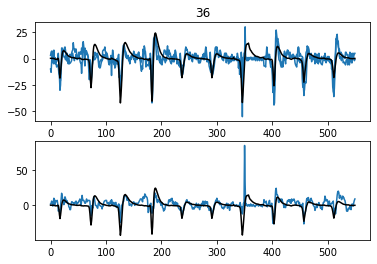

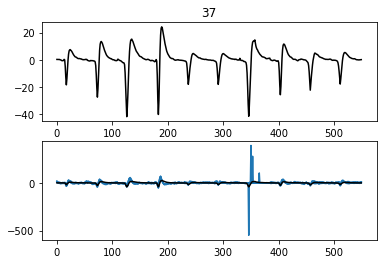

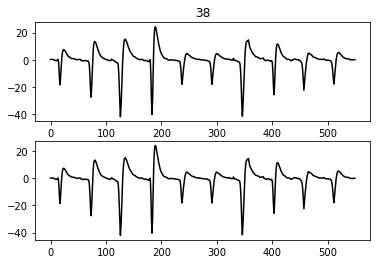

In [273]:

for i in [i for i in np.argwhere(pattern_movies_array[:,0]==12).flatten()]:
    ds = shifted_dss[i]
    plt.figure()
    
    ax1 = plt.subplot(211)
    ax2 = plt.subplot(212)
    for ss, s in enumerate(ds):
        good_spikes = np.all(error[i][ss] < exp_error, axis = 1)
        ax1.plot(s.reshape((s.shape[0],-1))[good_spikes].T, color = f"C{ss%10}")
        ax2.plot(s.reshape((s.shape[0],-1))[~good_spikes].T, color = f"C{ss%10}")
        
    ax1.plot(average_ds.flatten(), color = "black")
    ax1.set_title(pattern_movies_array[:,1][i])
    ax2.plot(average_ds.flatten(), color = "black")
    

In [251]:
shifted_dss[0][0].shape

(17, 10, 55)

In [275]:
electrodes[6]

11